In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
I_org = plt.imread(r'panorama.jpg')
I = cv2.cvtColor(I_org,cv2.COLOR_RGB2GRAY) # converting to greyscale so only need to detect corers for one channel

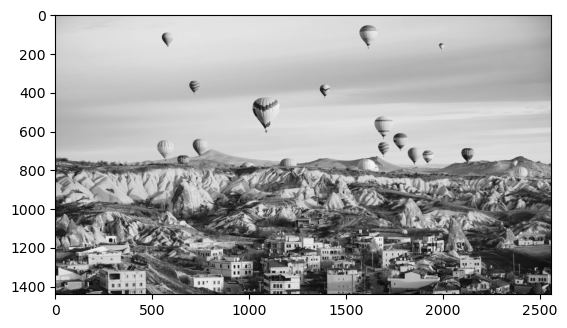

In [3]:
plt.imshow(I,cmap='gray')

In [21]:
I = np.float64(I) # converting grayscale image to float64
mask_x = np.array([[-1],[1]]) # mask_y is the transpose
Ix = cv2.filter2D(I,-1,mask_x)
Iy = cv2.filter2D(I,-1,mask_x.T)
Ix2 , Iy2 , IxIy = Ix*Ix , Iy*Iy , Ix*Iy # pointwise multiplication NOT matrix multiplication
K = np.ones((3,3)) # mask of ones
sIx2 = cv2.filter2D(Ix2,-1,K) # sum of Ix2's. Convolving with mask of ones
sIy2 = cv2.filter2D(Iy2,-1,K)
sIxIy = cv2.filter2D(IxIy,-1,K)
# computing eigenvalues
L1 = ((sIx2+sIy2)+((sIx2+sIy2)**2 - 4*(IxIy**2))**0.5)/2 # larger eigenvalue
L2 = ((sIx2+sIy2)-((sIx2+sIy2)**2 - 4*(IxIy**2))**0.5)/2 # smaller eigenvalue

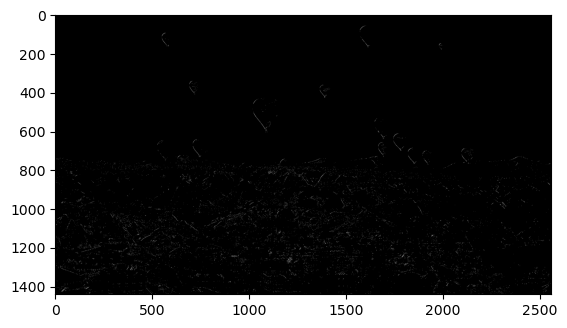

In [29]:
th = L2.mean()+5*L2.std()
C_image = L2>th
plt.imshow(C_image,cmap='gray')

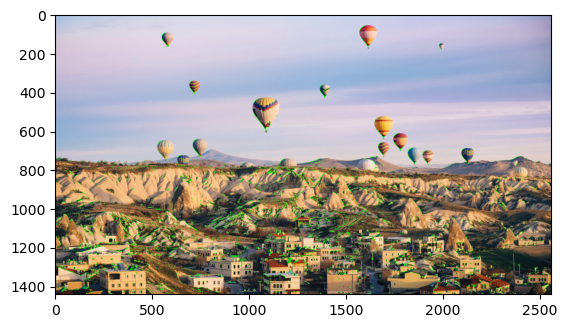

In [31]:
I2 = I_org[:,:,::-1]
idx = np.argwhere(C_image)
r,c = idx[:,0],idx[:,1]
for i in range(len(r)):
    I2 = cv2.circle(np.float32(I2),(c[i],r[i]),radius=1,color=(0,255,0),thickness=-1)
plt.imshow(np.array(I2[:,:,::-1],np.uint8))

# Harris Corner detection can also be used to detect edges.

### if l2 is very small but l1 is very large then the pixel is an edge pixel. If l2 is also very large then it is a corner

In [51]:
th_1 = L2.mean()+5*L2.std()
th_2 = L1.mean()+0.5*L1.std()
if L2<th_1 and L1>th_2:
    C_image = L2<th_1
    C_image = L1>th_2
    plt.imshow(C_image,cmap='gray')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

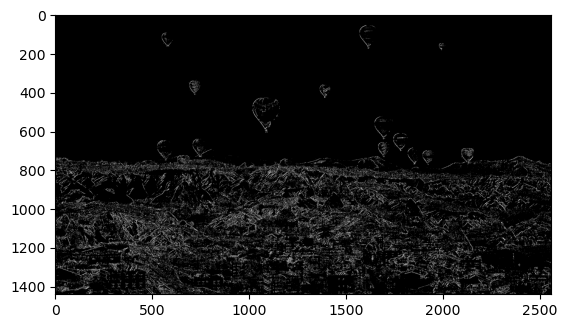

In [37]:
th_e = L2.mean()+0.5*L2.std()
C_image_e = L2>th_e
plt.imshow(C_image_e,cmap='gray')

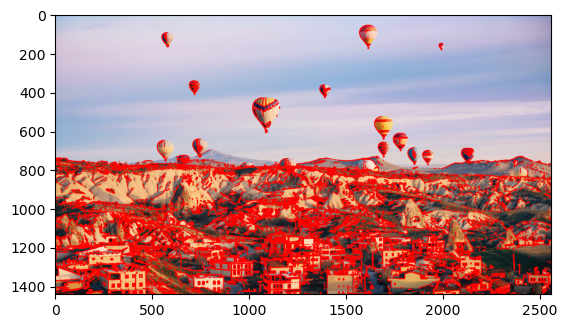

In [47]:
I2 = I_org[:,:,::-1]
idx = np.argwhere(C_image)
r,c = idx[:,0],idx[:,1]
for i in range(len(r)):
    I2 = cv2.circle(np.float32(I2),(c[i],r[i]),radius=1,color=(0,0,255),thickness=-1)
plt.imshow(np.array(I2[:,:,::-1],np.uint8))